
<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Сергей! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Проект: Обучение с учителем: качество модели

Цель исследования:

1. Исследовать основные параметры
2. Анализ зависимостей
3. Обучение модели

    Ход исследования:

        Данные я получу из файлов 
        "/datasets/market_file.csv" 
        "/datasets/market_money.csv"
        "/datasets/market_time.csv"
        "/datasets/money.csv"
        
        О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

        Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата, и приступлю к проведению исследовательского анализа.

    Таким образом, мое исследование пройдет в 5 этапов

    - Загрузка данных
    - Предобработка данных.
    - Исследовательский анализ данных
    - Объединение таблиц
    - Корреляционный анализ
    - Использование пайплайнов
    - Анализ важности признаков
    - Сегментация покупателей
    - Общий вывод

## Загрузка данных

In [1]:
!pip install shap
!pip u scikit-learn==1.5.1
!pip install phik

ERROR: unknown command "u"


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import re
import phik
import numpy as np
import time as tm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder
)

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    recall_score,
    precision_score,
    accuracy_score,
    roc_auc_score,
    f1_score
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.inspection import permutation_importance
import shap
from shap.plots import waterfall, beeswarm

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [5]:
market = pd.read_csv('/datasets/market_file.csv')
market_m = pd.read_csv('/datasets/market_money.csv')
time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Ошибка:    
    

 

- Не спеши сразу использовать sep, decimal итп, сначала посмотри как прочитаются данные по умолчанию. И только если возникнет проблема, тогда и используй эти аргументы (Только для фай money стоит кое что попробовать). А так? судя по info(), не все cтолбцы прочитались корректно

 
    
    



<div class="alert alert-info">
done, убрал во всех кроме money, ибо там эти параметры точно нужны 
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

In [6]:
display(market.head())
display(market.info())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

In [7]:
display(market_m.head())
display(market_m.info())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

In [8]:
display(time.head())
display(time.info())

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

In [9]:
display(money.head())
display(money.info())

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Вывод по загрузки данных

- все файлы нужно обработать, кастануть к типам

- market
    - 1300 строк,
    - 13 столбцов
- market_m 
    - 3900 строк,
    - 3 столбцов,    
- time
    - 2600 строк,
    - 3 столбцов
- money
    - 1300  строк,
    - 2 столбцов

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
    
 
	
- предварительный обзор данных сделан

   
<div class="alert alert-warning">
 

Совет 🤔:
    



  
    
- сейчас это не нужно (пока лучше вручную прописывать все эти .info, count_values, .describe, .diplicate...) но в будущем можешь обратить внимание на библиотечки, в которых уже собран необходимый минимум для EDA (и не только минимум), например [ydata_profiling](https://docs.profiling.ydata.ai/4.5/) или [pandas_profiling](https://habr.com/ru/companies/ruvds/articles/451478/) - будет информативно и красиво. Правда они довольно тяжелые,  кроме того требуют определённых версий других библиотек, что может потянуть за собой проблемы 

 


##  Предобработка данных

### market

In [10]:
def print_unique(frame, cols):
    for col in cols:
        display(col)
        display(frame[col].unique())

In [11]:
def cast_to_cat(frame, cols):
    for col in cols:
        frame[col] = frame[col].astype('category')
    return frame

In [12]:
def replace_values(frame, from_str, to_str, col):
    frame[col] = frame[col].str.replace(from_str, to_str)
    return frame

In [13]:
def isna_dubs_desc(frame):
    display('---- isna ----')
    display(frame.isna().sum())
    display('---- dups ----')
    display(frame.duplicated().sum())
    display('---- desc ----')
    display(frame.describe())

In [14]:
market.columns = [re.sub(r'(?<!^)(?=[A-Z])(?=%s)', '_', i).lower() for i in market.columns]


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



мы не используем верблюжий стили для названия столбцов, используй змеиный

    
 <div class="alert alert-warning">


Совет: 


- лучше использовать rename, чтобы не думать о порядке     


- лучше всего автоматизировать процесс приведения к змеиному стилю воспользовавшись  .lower, а с помощью регуляризации    (или .rename) избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду). Пример регулярного выражения:  
     
	df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
     
	 

<div class="alert alert-info">
done
    
PS я понимаю код конвеншен питона, но сложно переучиться после 5 лет джава программирования....

whitespace не осилил
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Что поделать, пока язык машинного обучения питон 

In [15]:
market.columns 

Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [16]:
market.columns = ['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит']

In [17]:
print_unique(market, market.columns)

'id'

array([215348, 215349, 215350, ..., 216645, 216646, 216647])

'покупательская_активность'

array(['Снизилась', 'Прежний уровень'], dtype=object)

'тип_сервиса'

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

'разрешить_сообщать'

array(['да', 'нет'], dtype=object)

'маркет_актив_6_мес'

array([3.4, 4.4, 4.9, 3.2, 5.1, 3.3, 4.7, 4.2, 3.9, 4.6, 4.3, 3.8, 2.7,
       4.8, 2.9, 3. , 2.4, 1.7, 3.6, 4. , 1.5, 3.5, 4.1, 3.1, 1.4, 0.9,
       5.6, 2.6, 5.5, 5.2, 5.8, 5. , 5.4, 5.7, 5.3, 3.7, 6.3, 6.6, 4.5,
       6.1, 5.9])

'маркет_актив_тек_мес'

array([5, 4, 3])

'длительность'

array([ 121,  819,  539,  896, 1064,  762,  431,  284,  192,  154,  450,
        110,  623,  199,  438,  923,  708,  167,  209,  581,  829,  607,
        572,  365,  566,  811,  268,  558,  534,  730,  488,  436,  637,
        554,  330,  504, 1020,  721,  495,  135,  663, 1047,  152,  754,
        525,  169,  966,  645,  706,  689,  882, 1007,  304,  339,  954,
        771,  699,  669,  511,  974,  666,  857, 1048,  756,  506,  759,
        768,  720,  219,  377,  472,  806,  449,  523,  503,  515,  813,
        249,  186,  336,  690,  824,  753,  674,  875,  844,  602,  855,
        448,  344,  922,  298,  893,  881,  372,  788,  937,  764,  851,
       1021,  627,  748,  684,  719,  891,  842,  573, 1057,  342,  638,
        458,  254,  600,  871,  574,  982,  324,  373,  839,  845,  475,
        509,  252,  820,  744,  541, 1079,  900,  474,  957,  773,  717,
        508,  184,  828,  944,  419,  302,  898,  705,  953,  355,  616,
        622,  335, 1025,  755,  549,  308,  903,  6

'акционные_покупки'

array([0.  , 0.75, 0.14, 0.99, 0.94, 0.26, 0.23, 0.17, 0.13, 0.35, 0.74,
       0.29, 0.98, 0.95, 0.22, 0.4 , 0.24, 0.21, 0.39, 0.9 , 0.89, 0.27,
       0.33, 0.34, 0.32, 0.93, 0.3 , 0.28, 0.31, 0.25, 0.36, 0.16, 0.11,
       0.2 , 0.18, 0.15, 0.6 , 0.12, 0.19, 0.44, 0.47, 0.91])

'популярная_категория'

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

'средний_просмотр_категорий_за_визит'

array([6, 4, 5, 3, 2, 1])

'неоплаченные_продукты_штук_квартал'

array([ 2,  4,  0,  1,  3,  5,  8,  6,  9, 10,  7])

'ошибка_сервиса'

array([1, 2, 6, 3, 7, 9, 4, 5, 8, 0])

'страниц_за_визит'

array([ 5,  4,  2,  3,  7,  1,  6,  8,  9, 14, 11, 15, 16, 10, 17, 13, 12,
       18, 19, 20])

In [18]:
market = replace_values(market, 'стандартт', 'стандарт', 'тип_сервиса')
market['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [19]:
market_cat_cols = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
market = cast_to_cat(market, market_cat_cols)
market['маркет_актив_6_мес'] = market['маркет_актив_6_мес'].astype('float32')
market['акционные_покупки'] = market['акционные_покупки'].astype('float32')

In [20]:
market.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [21]:
market.duplicated().sum()

0

In [22]:
display(market.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   category
 4   маркет_актив_6_мес                   1300 non-null   float32 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float32 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

None

In [23]:
market.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Вывод 

- поля кастанули к нужным типам
- пропусков не обнаружено
- явных аномалий не обнаружено
 
итоговая структура

<div style="white-space: pre-wrap">
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   category
 4   маркет_актив_6_мес                   1300 non-null   float32 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float32 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса                       1300 non-null   int64   
 12  страниц_за_визит                     1300 non-null   int64   
dtypes: category(4), float32(2), int64(7)
</div>



### market_m

In [24]:
market_m.columns = [re.sub(r'(?<!^)(?=[A-Z])(?=%s)', '_', i).lower() for i in market_m.columns]

In [25]:
market_m.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [26]:
print_unique(market_m, market_m.columns)

'id'

array([215348, 215349, 215350, ..., 216645, 216646, 216647])

'период'

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

'выручка'

array([   0. , 3293.1, 4472. , ..., 5224.6, 4720. , 4448.3])

In [27]:
market_m['выручка'] = market_m['выручка'].astype('float32')
market_m = cast_to_cat(market_m, ['период'])

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



препредыдущий_месяц это не предыдущий_месяц
    
    
У нас информация по трём месяцам, не нужно их сливать в два

<div class="alert alert-info">
done
</div>

In [28]:
isna_dubs_desc(market_m)

'---- isna ----'

id         0
период     0
выручка    0
dtype: int64

'---- dups ----'

0

'---- desc ----'

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696289
std,375.325686,1777.704224
min,215348.000000,0.000000
25%,215672.750000,4590.150146
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.203125


In [29]:
market_m.loc[market_m.duplicated()]

,id,период,выручка


In [30]:
market_m = market_m.drop_duplicates()

In [31]:
market_m.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696289
std,375.325686,1777.704224
min,215348.000000,0.000000
25%,215672.750000,4590.150146
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.203125


Вывод 

- поля кастанули к нужным типам
- пропусков не обнаружено
- удалено 5 полных дубликатов
 
итоговая структура

<div style="white-space: pre-wrap">
Int64Index: 3899 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       3899 non-null   int64   
 1   период   3899 non-null   category
 2   выручка  3899 non-null   float32 
dtypes: category(1), float32(1), int64(1)
</div>

### time

In [32]:
time.columns = [re.sub(r'(?<!^)(?=[A-Z])(?=%s)', '_', i).lower() for i in time.columns]

In [33]:
print_unique(time, time.columns)

'id'

array([215348, 215349, 215350, ..., 216645, 216646, 216647])

'период'

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

'минут'

array([14, 13, 10, 12,  8, 11,  6,  7,  9,  5, 15,  4, 16, 17, 19, 18, 22,
       20, 21, 23])

In [34]:
time = cast_to_cat(time, ['период'])

In [35]:
isna_dubs_desc(time)

'---- isna ----'

id        0
период    0
минут     0
dtype: int64

'---- dups ----'

0

'---- desc ----'

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Вывод 

- поля кастанули к нужным типам
- пропусков не обнаружено
- дубликатов не обнаружено
 
итоговая структура

<div style="white-space: pre-wrap">
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      2600 non-null   int64   
 1   период  2600 non-null   category
 2   минут   2600 non-null   int64   
dtypes: category(1), int64(2)
</div>

### money

In [36]:
display(money.head())
display(money.info())

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

In [37]:
money.columns = [re.sub(r'(?<!^)(?=[A-Z])(?=%s)', '_', i).lower() for i in money.columns]

In [38]:
money.columns

Index(['id', 'прибыль'], dtype='object')

In [39]:
money['прибыль'] = money['прибыль'].astype('float32')

In [40]:
isna_dubs_desc(money)

'---- isna ----'

id         0
прибыль    0
dtype: int64

'---- dups ----'

0

'---- desc ----'

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996630
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Вывод 

- пропусков не обнаружено
- дубликатов не обнаружено
- вообще не понятно что такое "Прибыль" 

 
итоговая структура

<div style="white-space: pre-wrap">
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




 
- здорово что обращено внимание на  скрытые дубликаты  
    
  


<div class="alert alert-warning">

Совет: 



- можно еще поискать опечатки  (кстати повлияют ли они  на работу модели?)

   

<div class="alert alert-info">
я их искал в фоне (к примеру как я поменял препредыдущий_месяц), на самом деле тут даже половины нет того, что я делал. Ибо если я оставил все что я делал, тебе как ревьюверу было бы на много сложнее проверять + там не было ничего информативного
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:

Понял

Действительно опечатки никак не повлияли на моделирование.  Так, просто человеческий глаз ошибки мозолят


 

## Исследовательский анализ данных

In [41]:
def disp_pie(frame, title, col):
    fig = plt.figure(figsize=(14,7))
    fig.suptitle(title, fontsize=12, fontweight='bold')

    ax = fig.add_subplot(111)
    ax.pie(frame.groupby(by=col)[col].count(),autopct='%1.1f%%')
    plt.legend(frame[col].unique(), loc="best")

    plt.show()

In [42]:
def disp_depend(frame, x, y, title):
    frame.plot(x=x, y=y, kind='scatter', alpha=0.3, \
               title=title);

In [43]:
def disp_num_group_hist(frame , by, col, method, title ,xLab ,yLab):
    ax = getattr(frame.groupby(by=by)[col], method)().sort_values() \
        .plot(x=by, y=method, kind='bar', alpha=0.7, title=title)
    ax.set_xlabel(xLab)
    ax.set_ylabel(yLab)
    plt.show()
    ;
    

In [44]:
def disp_hist(frame, col, title, xL, yL):
    frame[col].plot(kind='hist', bins=100)
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)

    plt.show()

In [45]:
def dumping(frame, col, title):
    fig = plt.figure(figsize=(14,7))
    fig.suptitle(title, fontsize=12, fontweight='bold')

    ax = fig.add_subplot(111)
    ax.boxplot(frame[col])

    plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍 нужные операции выделены в  функции






<div class="alert alert-warning">


 Совет:

    
     
    
И парочку cоветов по оформлению функций:    
    
- Для таких простых функций острой необходимости нет, код говорит сам за себя, но если хочешь попрактиковаться, можешь включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru).  Можно оставить описание того что делает эта функция, а затем попробовать вызвать что та напишешь с помощью
    
    
    print(my_function.__doc__)
    
или    
    
    help(my_function)


- Код создания функции обычно оставляет под импортами, так их легче контролировать
 

<div class="alert alert-info">
честно говоря есть вообще идея сделать свою либу и там уже сделать как нужно, но позже, ибо дедлайны горят
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Стоит конечно
Начиная с прошлого проекта можно было уже потихоньку это делать.  Например Мы ведь каждый проект строим графики, есть рекомендация для количественных одновременно используя сразу boxplot и гоистограмы.  Вот и вариант сразу написать функцию и решить этот вопрос навсегда. Кто-то пишет свои функции для первичного анализа данных (describe, info....).  В конечном счёте сэкономи тебе время в будущем


 

### market

#### activity

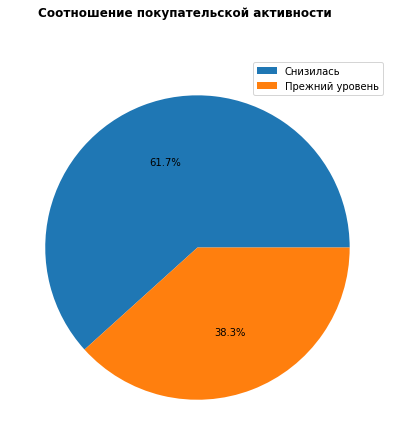

In [46]:
disp_pie(market, 'Соотношение покупательской активности', 'покупательская_активность')

#### typeService

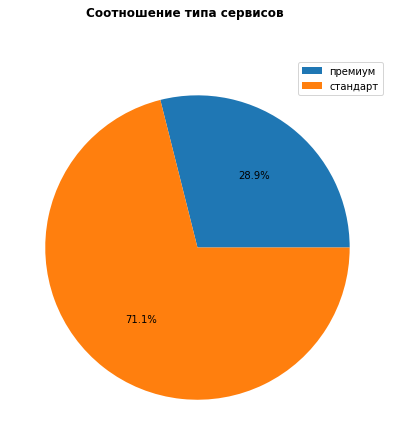

In [47]:
disp_pie(market, 'Соотношение типа сервисов', 'тип_сервиса')

#### allowNotificate

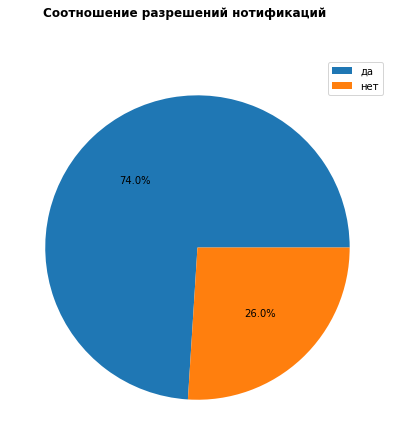

In [48]:
disp_pie(market, 'Соотношение разрешений нотификаций', 'разрешить_сообщать')

#### activityLast6Months

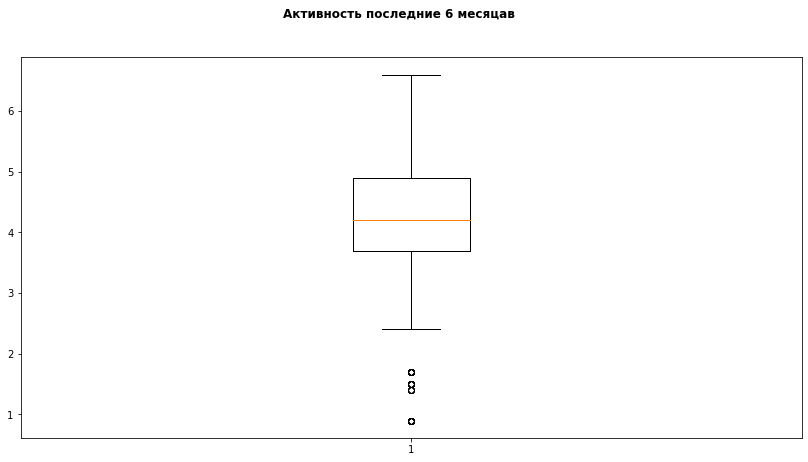

In [49]:
dumping(market, 'маркет_актив_6_мес', 'Активность последние 6 месяцав')

In [50]:
slice_m = market.loc[market['маркет_актив_6_мес'] < 2]
display(slice_m.describe())
display(slice_m.sort_values(by='маркет_актив_6_мес', ascending=True).head())

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,215604.388889,1.369444,3.972222,578.305556,0.568889,2.333333,3.500000,4.333333,4.500000
std,277.822480,0.332797,0.608798,205.278044,0.315747,1.095445,2.131398,1.882248,2.478479
min,215378.000000,0.900000,3.000000,188.000000,0.210000,1.000000,0.000000,1.000000,1.000000
25%,215449.250000,0.900000,4.000000,446.500000,0.317500,2.000000,3.000000,3.000000,3.000000
50%,215541.500000,1.500000,4.000000,590.000000,0.390000,2.000000,3.000000,4.000000,4.000000
75%,215655.250000,1.700000,4.000000,735.000000,0.910000,3.000000,5.000000,5.250000,5.000000
max,216638.000000,1.700000,5.000000,932.000000,0.990000,6.000000,9.000000,8.000000,16.000000


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
81,215429,Снизилась,премиум,нет,0.9,4,690,0.24,Домашний текстиль,2,5,7,4
204,215552,Снизилась,стандарт,да,0.9,4,624,0.89,Косметика и аксесуары,1,9,5,1
205,215553,Снизилась,стандарт,да,0.9,4,360,0.33,Домашний текстиль,2,3,3,5
164,215512,Снизилась,стандарт,да,0.9,3,839,0.40,Косметика и аксесуары,3,3,7,7
147,215495,Снизилась,стандарт,да,0.9,4,788,0.98,Техника для красоты и здоровья,3,3,3,3


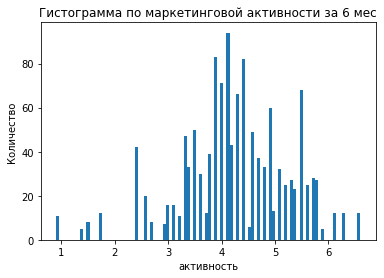

In [51]:
disp_hist(market, 'маркет_актив_6_мес', 'Гистограмма по маркетинговой активности за 6 мес', 'активность', 'Количество')

#### activityLastMonth

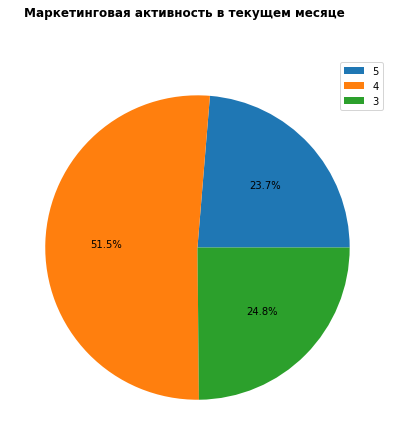

In [52]:
disp_pie(market, 'Маркетинговая активность в текущем месяце', 'маркет_актив_тек_мес')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Скорее это категориальный признак, значит используем графики типа pie, count, bar 

<div class="alert alert-info">
done
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

#### duration

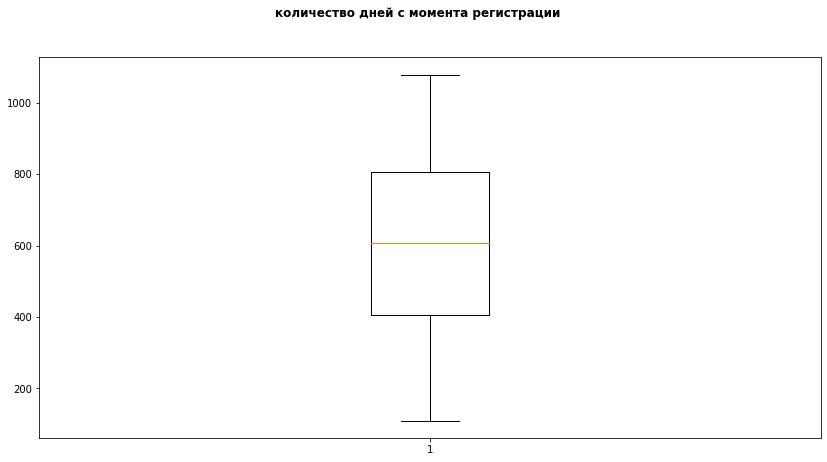

In [53]:
dumping(market, 'длительность', 'количество дней с момента регистрации')

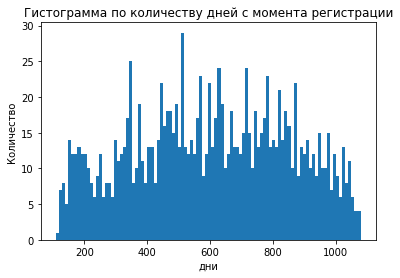

In [54]:
disp_hist(market, 'длительность', 'Гистограмма по количеству дней с момента регистрации', 'дни', 'Количество')

#### promoPurch

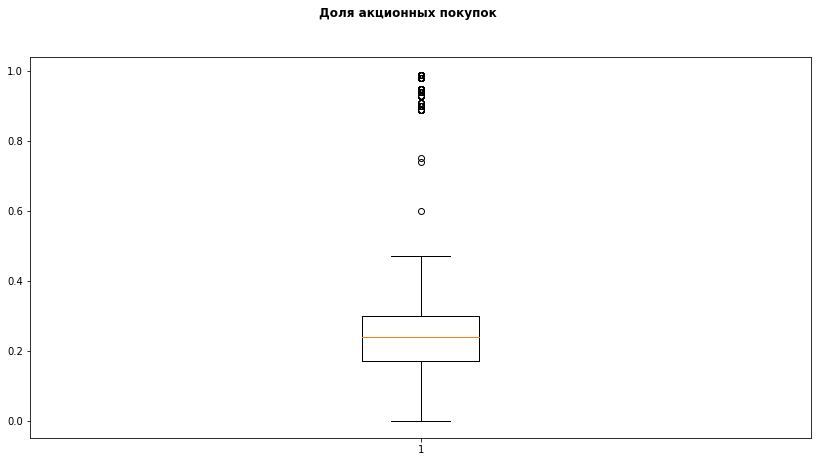

In [55]:
dumping(market, 'акционные_покупки', 'Доля акционных покупок')

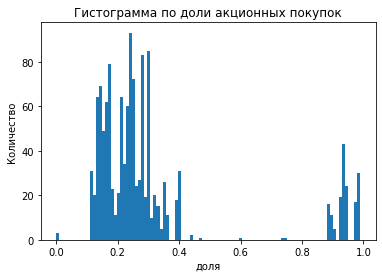

In [56]:
disp_hist(market, 'акционные_покупки', 'Гистограмма по доли акционных покупок', 'доля', 'Количество')

In [57]:
slice_m = market.loc[market['акционные_покупки'] > 0.5]
display(slice_m.describe())
display(slice_m.sort_values(by='акционные_покупки', ascending=False).head())

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,215753.154762,3.770238,3.97619,602.964286,0.940655,2.815476,3.613095,4.130952,5.732143
std,382.942562,1.084102,0.70032,239.714273,0.046444,1.293187,2.483299,1.823202,3.260126
min,215349.000000,0.900000,3.00000,147.000000,0.600000,1.000000,0.000000,0.000000,1.000000
25%,215480.750000,3.275000,3.00000,435.250000,0.930000,2.000000,2.000000,3.000000,3.000000
50%,215625.500000,4.000000,4.00000,613.000000,0.940000,3.000000,3.000000,4.000000,5.000000
75%,215842.500000,4.400000,4.00000,800.250000,0.980000,4.000000,5.000000,5.000000,7.000000
max,216647.000000,5.700000,5.00000,1064.000000,0.990000,6.000000,10.000000,8.000000,15.000000


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
579,215927,Снизилась,стандарт,да,5.2,4,801,0.99,Кухонная посуда,2,1,4,9
484,215832,Снизилась,стандарт,нет,4.1,3,206,0.99,Товары для детей,4,4,3,4
256,215604,Снизилась,стандарт,нет,3.1,5,458,0.99,Косметика и аксесуары,1,5,3,4
592,215940,Снизилась,премиум,да,5.7,5,903,0.99,Косметика и аксесуары,2,8,6,12
357,215705,Снизилась,премиум,нет,0.9,4,657,0.99,Домашний текстиль,2,4,2,5


#### popularCat

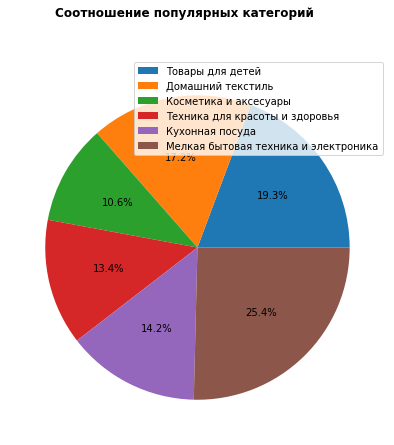

In [58]:
disp_pie(market, 'Соотношение популярных категорий', 'популярная_категория')

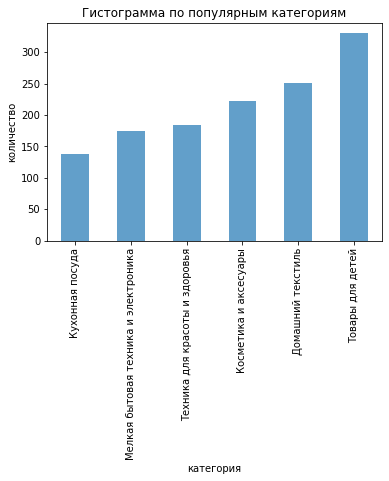

In [59]:
disp_num_group_hist(market, 'популярная_категория', 'популярная_категория', 'count','Гистограмма по популярным категориям' ,'категория' ,'количество');

#### avgWatchedCatPerSession

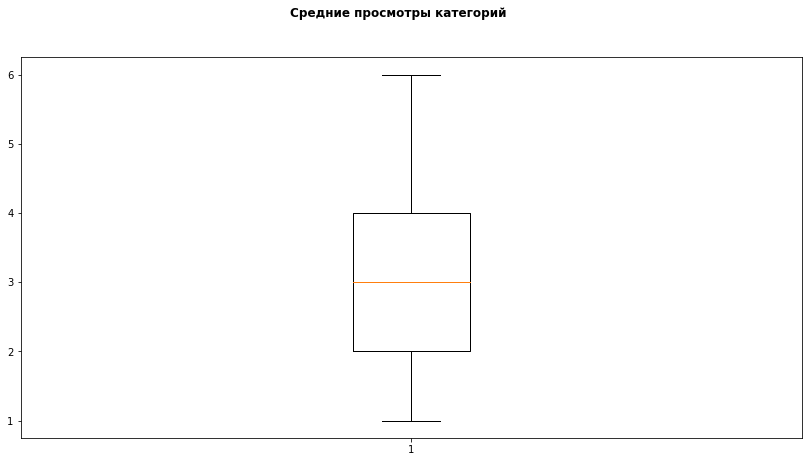

In [60]:
dumping(market, 'средний_просмотр_категорий_за_визит', 'Средние просмотры категорий')

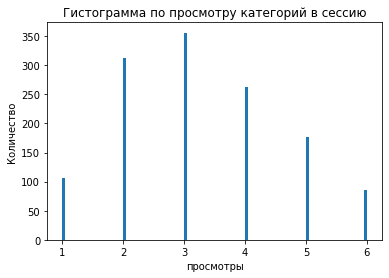

In [61]:
disp_hist(market, 'средний_просмотр_категорий_за_визит', 'Гистограмма по просмотру категорий в сессию', 'просмотры', 'Количество')

#### unpaidGoods3Months

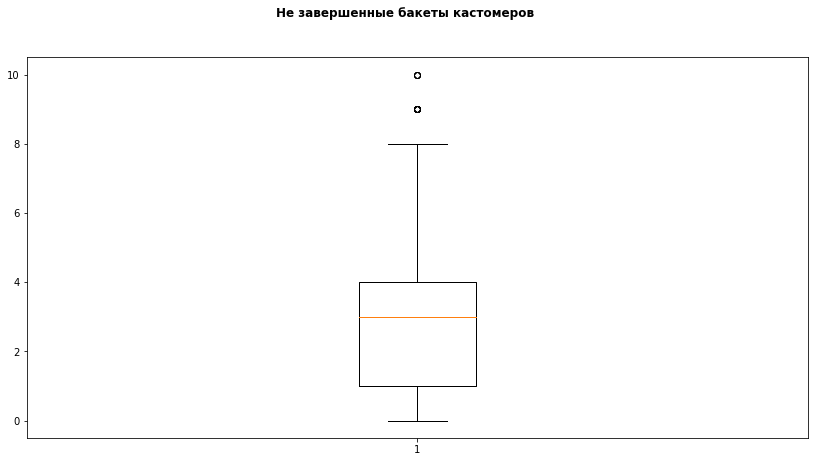

In [62]:
dumping(market, 'неоплаченные_продукты_штук_квартал', 'Не завершенные бакеты кастомеров')

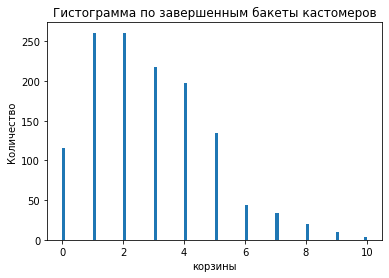

In [63]:
disp_hist(market, 'неоплаченные_продукты_штук_квартал', 'Гистограмма по завершенным бакеты кастомеров', 'корзины', 'Количество')

#### serviceError

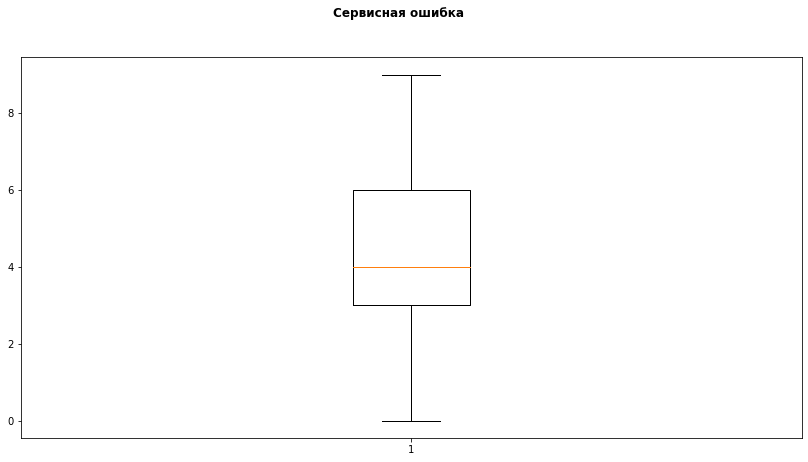

In [64]:
dumping(market, 'ошибка_сервиса', 'Сервисная ошибка')

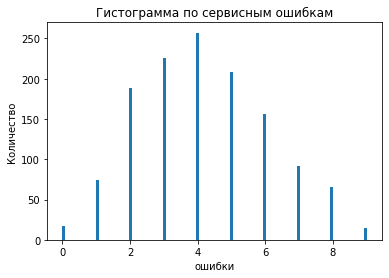

In [65]:
disp_hist(market, 'ошибка_сервиса', 'Гистограмма по сервисным ошибкам', 'ошибки', 'Количество')

#### pagesPerSession

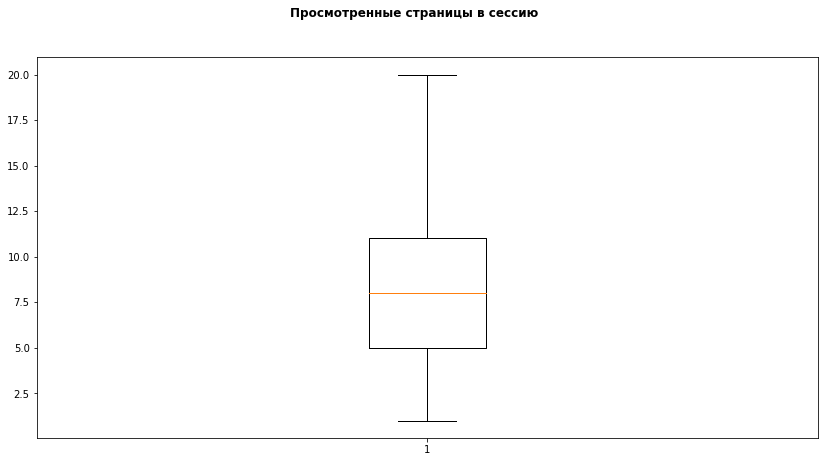

In [66]:
dumping(market, 'страниц_за_визит', 'Просмотренные страницы в сессию')

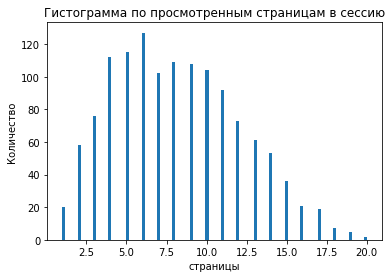

In [67]:
disp_hist(market, 'страниц_за_визит', 'Гистограмма по просмотренным страницам в сессию', 'страницы', 'Количество')

Вывод 

- активность в сравнением с предыдущим месяцем, снизиласть
- клиентов без подписки больше
- 74% клиентов иеют включеную нотификацию
- есть легкие вбросы в Активность последние 6 месяцав
- средняя маркетинговая активность последние месяц составила 4
- в среднем клиенты зарегистрированы 600 дней назад
- ярко выраженная средняя акционных покупок с долей 30%
- мелкая бытовая техника и товары для детей самые популярные категории
- в среднем просматривают 4 категории товаров в сессию
- 1-2 корзины остаются не купленными
- в среднем простатривают 5-10 страниц в сессию
 

### market_m

#### period

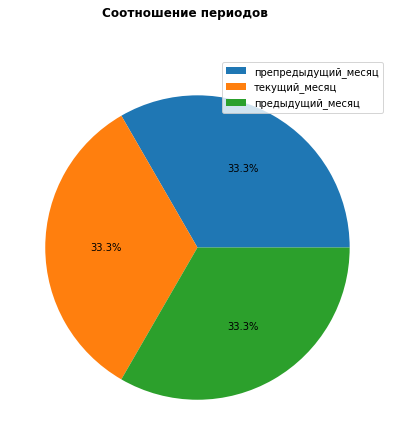

In [68]:
disp_pie(market_m, 'Соотношение периодов', 'период')

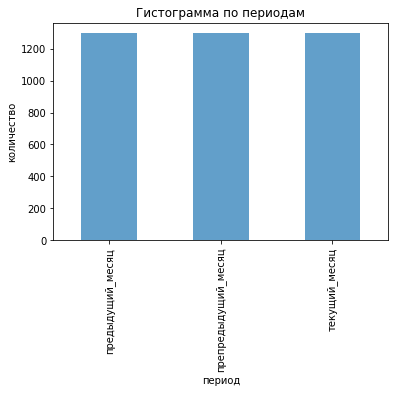

In [69]:
disp_num_group_hist(market_m, 'период', 'период', 'count','Гистограмма по периодам' ,'период' ,'количество');

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет 🤔:


- Если хочешь убрать AxesSubplot:xlabel..  то ставь в конце `;` или пропиши plt.show()

 

<div class="alert alert-info">
done
</div>

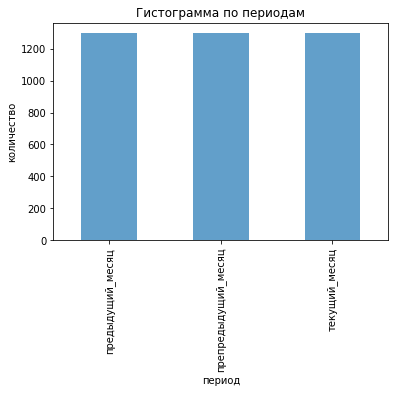

In [70]:
disp_num_group_hist(market_m, 'период', 'период','count','Гистограмма по периодам' ,'период' ,'количество')

#### revenue

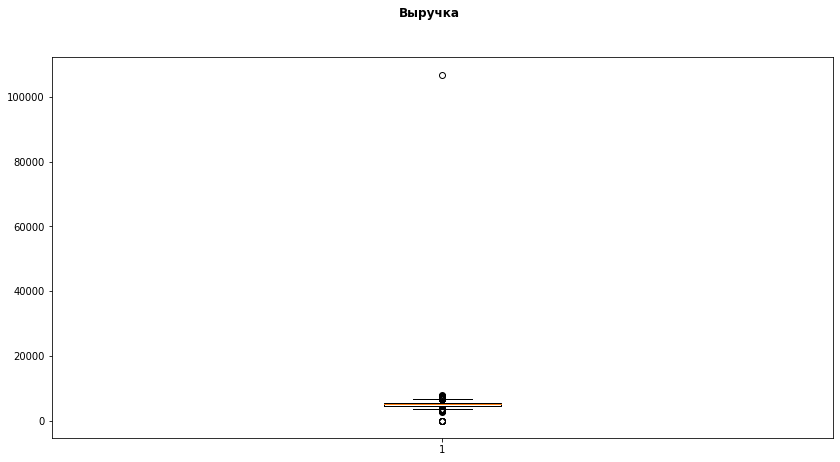

In [71]:
dumping(market_m, 'выручка', 'Выручка')

In [72]:
market_m[market_m['выручка'] > 40000]

,id,период,выручка
98,215380,текущий_месяц,106862.203125


In [73]:
market_m = market_m.loc[market_m['выручка'] < 40000]

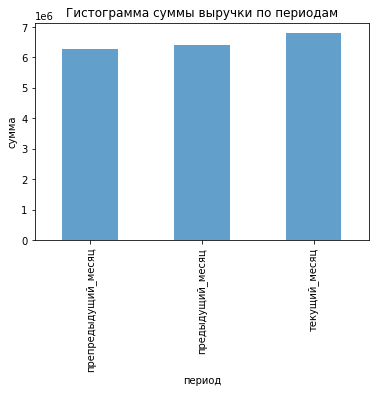

In [74]:
disp_num_group_hist(market_m, 'период', 'выручка','sum','Гистограмма суммы выручки по периодам' ,'период' ,'сумма')

Вывод 

- количество совершенных покупок в текущем месяце больше чем в прошлом
- сумма выручки больше в прошлом

### time

#### period  

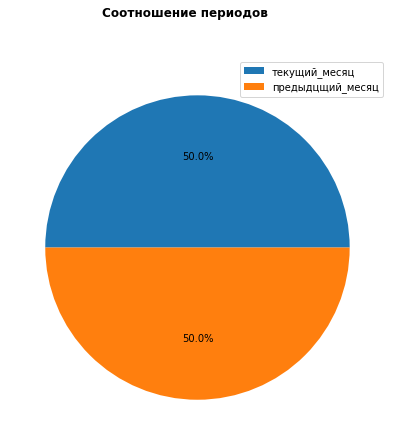

In [75]:
disp_pie(time, 'Соотношение периодов', 'период')

#### mins    

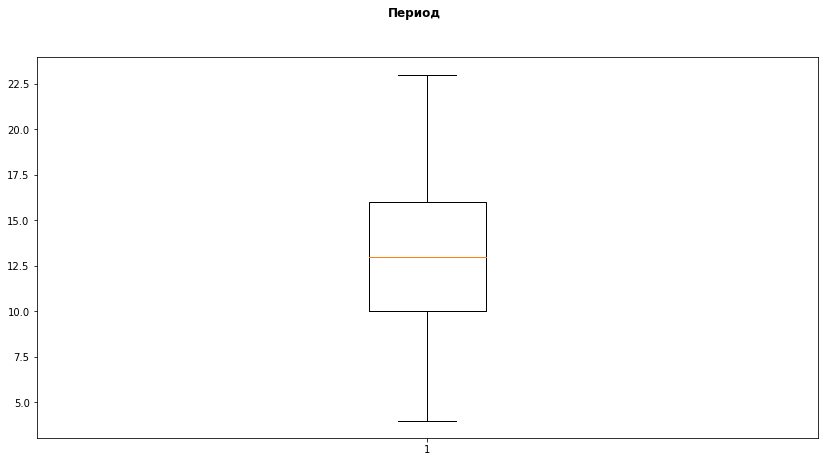

In [76]:
dumping(time, 'минут', 'Период')

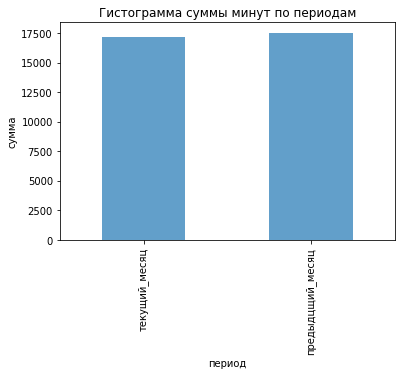

In [77]:
disp_num_group_hist(time, 'период', 'минут','sum','Гистограмма суммы минут по периодам' ,'период' ,'сумма')



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет:

    
- для гистограмм по выручке и минутам, стоит предварительно сделать группировку по "период" (у нас будет 3 графика по выручке и 2 по минутам), это разумно, ведь именно в таком виде мы используем их      

<div class="alert alert-info">
ради одного лишнего группирования?
оно в методе disp_num_group_hist
</div>

Вывод 

- время проведенное на сайте в текущем и прошлом месяце одинаково

### money

#### profit

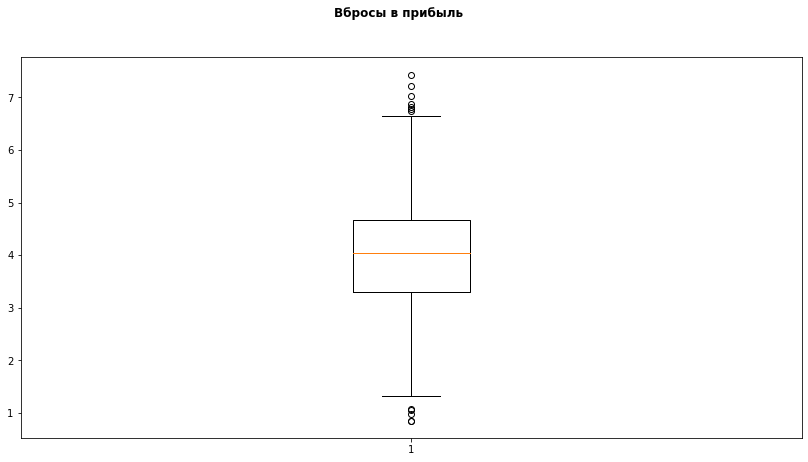

In [78]:
dumping(money, 'прибыль', 'Вбросы в прибыль')

Вывод 

- ярко выраженных вбрососв нет

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

    
 
	
	
- Правильно что продолжаешь практику с прошлого проекта и строишь 2 типа графиков для количественных признаков 
    
 
- Для  разных типов данных используешь  соответствующие графики
    
 

 

- Есть выводы по увиденному. Хотя можно было расписать поподробнее
 
 

<div class="alert alert-warning">


Совет 🤔:

   
- можно пойти дальше  и для графиков распределений сделать разбивку по таргету. Так мы можем получить дополнительную информацию для лучшего понимания наших данные, может что-то пригодится для раздела сегментации. Если использовать seaborn, это можно сделать с помощью аргумента [hue](https://www.statology.org/seaborn-histogram-hue/). В результате мы получим наложенные (в разбивки по таргету) 2 гистограммы (boxplot тоже неплохо добавить) для каждого количественного признака. И о категориальных незабываем. Будет красиво и информативно.
 

 
- подумай о лучшем размещении графиков, сейчас это длинный ряд графиков, который надо прокручивать вниз, почему бы не использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/) и не разместить графики еще и по вертикали в два или три столбца!? Или например для количественных признаков -  столбец гистограммы, другой boxplot

    
- а ещё бы  посоветовал использовать библиотеку    [seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/), она строит  симпатичнее и проще matplotlib. Использовать matplotlib это как выучиться на механике, но если умеешь на механике но на автомате (seaborn) точно получится. Есть небольшие отличия в названиях графиках, и фнкциональных возможностях, но это мелочи
     
 

- почему бы не написать универсальную функцию , ведь мы в каждом проекте строим графики для категориальных и количественных признаков. Один раз пишем универсальный функцию, а затем всю жизнь её используем    



## Объединение таблиц

In [79]:
time_pivot = pd.pivot_table(time,columns=["период"],index=['id']).droplevel(0, axis=1)
time_pivot.columns = ['предыдцщий_месяц_минут', 'текущий_месяц_минут']
time_pivot

,предыдцщий_месяц_минут,текущий_месяц_минут
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [80]:
market_m_pivot = pd.pivot_table(market_m,columns=["период"],index=['id']).droplevel(0, axis=1)
market_m_pivot.columns = ['предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка']
market_m_pivot

,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
id,,,
215348,0.0,0.0,3293.100098
215349,5216.0,4472.0,4971.600098
215350,5457.5,4826.0,5058.399902
215351,6158.0,4793.0,6610.399902
215352,5807.5,4594.0,5872.500000
...,...,...,...
216643,3664.0,4704.0,4741.700195
216644,4729.0,5299.0,5353.000000
216645,5160.0,5334.0,5139.200195


In [81]:
full_table = market.copy()
full_table = full_table.merge(time_pivot, on='id', how='left')
full_table = full_table.merge(market_m_pivot, on='id', how='left')
full_table = full_table.set_index('id', drop=True)
full_table.loc[full_table['текущий_месяц_выручка'].isna(), 'текущий_месяц_выручка'] = full_table.loc[full_table['текущий_месяц_выручка'].isna(), 'текущий_месяц_выручка'].fillna(0)
full_table

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдцщий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,13,14,0.0,0.0,3293.100098
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.600098
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.399902
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.399902
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,3664.0,4704.0,4741.700195
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,4729.0,5299.0,5353.000000
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,5160.0,5334.0,5139.200195


In [82]:
isna_dubs_desc(full_table)

'---- isna ----'

покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
предыдцщий_месяц_минут                 0
текущий_месяц_минут                    0
предыдущий_месяц_выручка               0
препредыдущий_месяц_выручка            0
текущий_месяц_выручка                  0
dtype: int64

'---- dups ----'

11

'---- desc ----'

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдцщий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923,13.467692,13.204615,4936.920410,4825.207031,5232.759277
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126,3.932029,4.220589,739.597961,405.979675,847.688599
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000,5.000000,4.000000,0.000000,0.000000,0.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000,11.000000,10.000000,4496.750000,4583.000000,4703.849976
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000,13.000000,13.000000,5005.000000,4809.000000,5179.550049
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000,17.000000,16.000000,5405.625000,5053.500000,5759.275024
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000,23.000000,23.000000,6869.500000,5663.000000,7799.399902


In [83]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   покупательская_активность            1300 non-null   category
 1   тип_сервиса                          1300 non-null   category
 2   разрешить_сообщать                   1300 non-null   category
 3   маркет_актив_6_мес                   1300 non-null   float32 
 4   маркет_актив_тек_мес                 1300 non-null   int64   
 5   длительность                         1300 non-null   int64   
 6   акционные_покупки                    1300 non-null   float32 
 7   популярная_категория                 1300 non-null   category
 8   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 9   неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 10  ошибка_сервиса                       1300 non-null   int64   
 11  страниц_за

Вывод:

итоговая структура

<div style="white-space: pre-wrap">
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   покупательская_активность            1300 non-null   category
 1   тип_сервиса                          1300 non-null   category
 2   разрешить_сообщать                   1300 non-null   category
 3   маркет_актив_6_мес                   1300 non-null   float32 
 4   маркет_актив_тек_мес                 1300 non-null   int64   
 5   длительность                         1300 non-null   int64   
 6   акционные_покупки                    1300 non-null   float32 
 7   популярная_категория                 1300 non-null   category
 8   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 9   неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 10  ошибка_сервиса                       1300 non-null   int64   
 11  страниц_за_визит                     1300 non-null   int64   
 12  предыдцщий_месяц_минут               1300 non-null   int64   
 13  текущий_месяц_минут                  1300 non-null   int64   
 14  предыдущий_месяц_выручка             1300 non-null   float32 
 15  препредыдущий_месяц_выручка          1300 non-null   float32 
 16  текущий_месяц_выручка                1300 non-null   float32 
dtypes: category(4), float32(5), int64(8)
</div>

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



- перед нами стоит задача подготовки данных, так чтобы в модель данные, чтобы каждая строка отвечала за конкретного уникального клиента. Это не выполняется для двух файлов - money, time. Перед объединением  их нужно предварительно "приготовить"    перевернув   столбцы в строки. Обрати внимание на столбец "период", уникальные значения в нём мы превращаем в столбцы,  а затем делаем объединение не создавая дубликаты


 

<div class="alert alert-warning">


Совет 🤔:



Это можно воспользоваться [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html),  также  подошли бы инструменты попроще  pivot или set_index + unstack. Стоит поискать уже готовое решение, а не писать фнкции и циклы. Кроме того часто  такого рода решения написано на языке С, а значит они оптимальны с точки зрения скорости. [Вот примеры использования](https://dfedorov.spb.ru/pandas/%D0%A1%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%20pandas.html)

    
    
(Подскажу, убрав выбрось и трёх неактивных у нас должно получиться 1296 строк)    

 

<div class="alert alert-info">
Пересмотрел таблу, вбросов в "минут" и "прибыль" нет, + в минутах нет нулей, активность есть у всех 1300 записей
</div>

In [84]:
full_table = full_table.loc[(full_table['предыдущий_месяц_выручка'] != 0)]
full_table = full_table.loc[(full_table['препредыдущий_месяц_выручка'] != 0)]
full_table = full_table.loc[(full_table['текущий_месяц_выручка'] != 0)]

In [85]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   покупательская_активность            1296 non-null   category
 1   тип_сервиса                          1296 non-null   category
 2   разрешить_сообщать                   1296 non-null   category
 3   маркет_актив_6_мес                   1296 non-null   float32 
 4   маркет_актив_тек_мес                 1296 non-null   int64   
 5   длительность                         1296 non-null   int64   
 6   акционные_покупки                    1296 non-null   float32 
 7   популярная_категория                 1296 non-null   category
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64   
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64   
 10  ошибка_сервиса                       1296 non-null   int64   
 11  страниц_за

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:



 
 мы убираем клиентов которые не проявили активность хотя бы в одном из 3 месяцев (активность это реальные покупки, а не заходы на страницу, трата время итп). Можешь объяснить почему мы это делаем?


Подскажу у нас должно получиться 1300 - 1 выброс - 3 неактивных = 1296 строк  

<div class="alert alert-info">
done
    
угу нашел, эти показатели могут повлиять не только на предсказания, но и корреляцию и процие параметры, где их будет сложно отловить и определить. 
    
    
P.S. да, повлияли, немного изменил итоги
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



👍


(Скорее всего убираем их потому что нули могут быть не показателем торговой активности, а например того что покупатель ещё Не был нашим клиентом, или уезжал в отпуск, или какой-то разовый клиент,  так зачем брать в расчёт данные которые явно исказят наш анализ) 

## Корреляционный анализ

In [86]:
full_table.columns

Index(['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'предыдцщий_месяц_минут', 'текущий_месяц_минут',
       'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
       'текущий_месяц_выручка'],
      dtype='object')

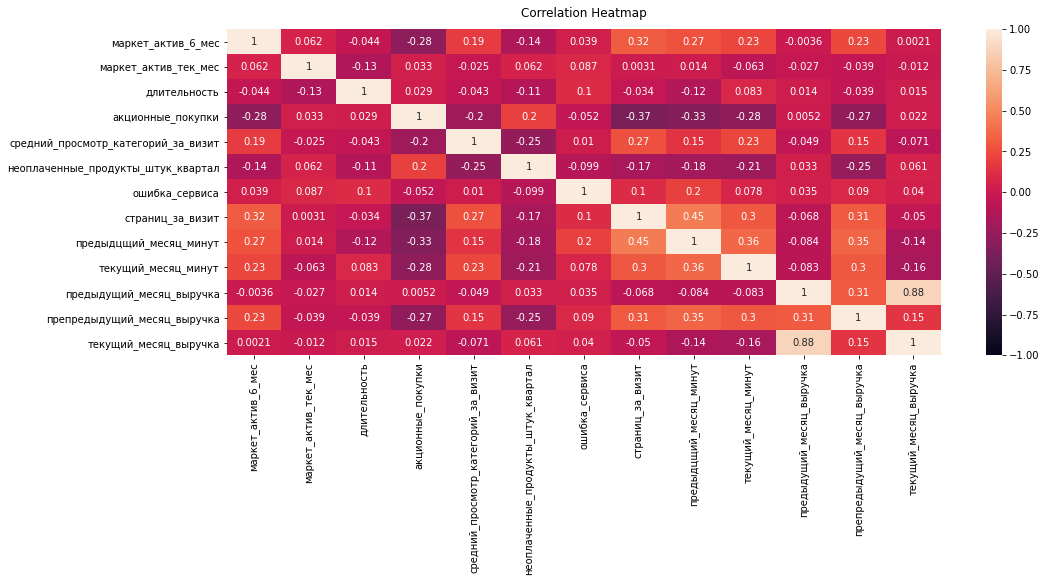

In [87]:
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(full_table.loc[:, 'покупательская_активность' : 'текущий_месяц_выручка'].corr(method='spearman'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'предыдцщий_месяц_минут', 'текущий_месяц_минут', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка']


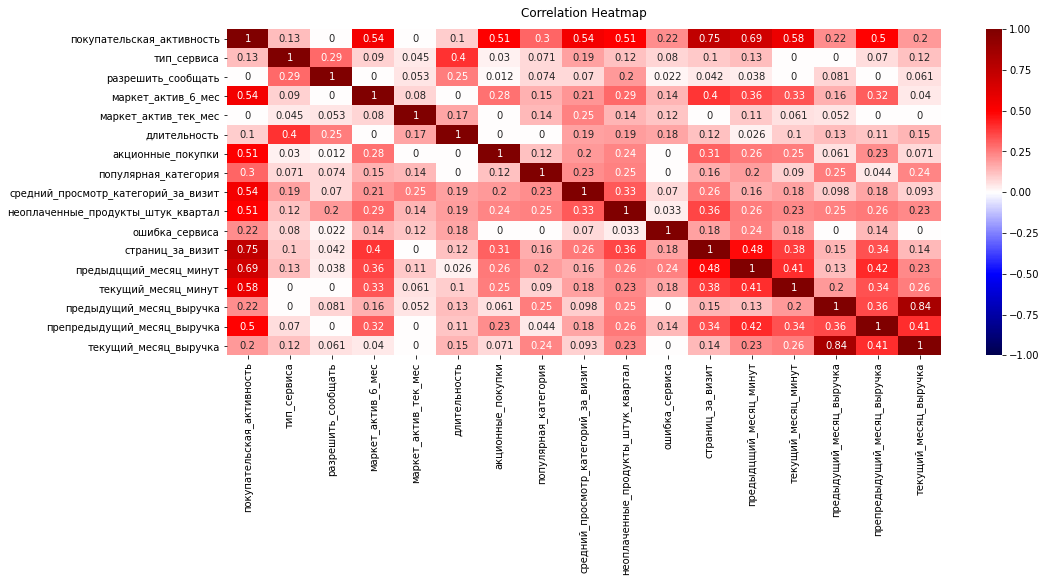

In [88]:
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(full_table.loc[:, 'покупательская_активность' : 'текущий_месяц_выручка'].phik_matrix(), vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Вывод 

- мультиколлинеарности не обнаружено
- существует порреляция между
        - выручками
        - просмотренных страниц к покупательской активности
        - времени на сайте к активности
        - акционные покупки к прошлым месяцам

 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


 
- при работе с не нормально распределенными признаками был подсчитан Спирмен, а не Пирсон


- проведен анализ на мультиколлинеарность между переменными  

<div class="alert alert-warning">


Совет: 

    
    
- выводы стоит писать развёрнуто, неужели кроме мультиколлинеарности ничего нельзя проанализировать по матрице корреляции?    
    

- можно поменять политру для удобства восприятия, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет
 
- было бы интересно посмотреть на  корреляцию таргета с признаками, но наш таргет категориальный, поэтому  Спирмен или Пирсон не подходят, но есть такая библиотека [phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7), ее особенности: работа с разными типами данных, в том числе категориальными, учет нелинейных отношений, плюс отличная интерпретация и визуализация   
 
    
- для разнообразия можно провести проверку на мультиколлинеарность с помощью VIF
 


<div class="alert alert-info">
нужно ли писать об очевидных вещах, что - "видна корреляция между выручками в периодах" или "страниц за сессию к активности"

т.е. точно нужно указать если их нет, потому что это крайне странно, иначе есть ли смысл?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Конечно имеет, иначе для чего мы всё это делаем.  В конечном счёте всё что мы делаем выше, позволит нам получить более качественную метрику. Возможно информацию которую ты получил выше поможет тебе и в разделе сегментация.  Никто не говорит тебе расписывать каждое корреляционное значение.  Но 2-3 предложения, с учётом таблицы Чедока характеристики силы корреляционной связи - оставить стоит

<div class="alert alert-info">
done
</div>

## Использование пайплайнов

In [89]:
full_table.columns

Index(['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'предыдцщий_месяц_минут', 'текущий_месяц_минут',
       'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
       'текущий_месяц_выручка'],
      dtype='object')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    full_table.drop(['покупательская_активность'], axis=1),
    full_table['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = full_table['покупательская_активность'])


# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 
               'средний_просмотр_категорий_за_визит','неоплаченные_продукты_штук_квартал','ошибка_сервиса','страниц_за_визит',
               'предыдцщий_месяц_минут', 'текущий_месяц_минут',
               'предыдущий_месяц_выручка','препредыдущий_месяц_выручка', 'текущий_месяц_выручка']
y_columns = ['покупательская_активность']

In [91]:
lab = LabelEncoder()

original_classes = ['Снизилась', 'Не снизилась']
lab.classes = np.array(original_classes) 

y_train = lab.fit_transform(y_train)
y_test = lab.transform(y_test)

pd.DataFrame(lab.inverse_transform(y_train), y_train, columns=['LabelEncoder'])

,LabelEncoder
0,Прежний уровень
1,Снизилась
0,Прежний уровень
0,Прежний уровень
1,Снизилась
...,...
0,Прежний уровень
0,Прежний уровень
1,Снизилась
0,Прежний уровень






<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:
 

- использован LabelEncoder,  но не хватает проверки, что у нас закодировал с нулём а что единицей. Вообще, единицей кодируются наш положительный класс (Судя по постановке задачи - это "снизилась"). Поэтому будет лучше если ты ультимативна укажешь что "снизилась" это единица:



    original_classes = ['Снизилась', 'Не снизилась']


    le_custom = LabelEncoder()
    le_custom.classes = np.array(original_classes)   
    
    
И теперь у нас 'Снизилась',  закодироваться единицей

 
	
- какие могут быть сложности если пропустить этот момент?! Когда у нас бинарная классификация, то метрики presicion, recall, f1 (для accuracy, roc-auc тут без разницы) считаются толко по положительному классу.  Положительный класс - это тот класс который нас больше интересует.  Если мы за этим не проследим,  и метрики не по тому классу посчитаются, и scoring при подборе гиперпараметров может делаться не по тому классу что нас интересует. Кроме того,  predict_proba возвращает два столбцы, если мы  закодируем нужный класс единичкой, то будем точно знать что его вероятность это второй столбец. Вот такая путаница и проблемы могут возникнуть...Нам это надо!?   
    
    
    
	
- константа лучше оставлять сразу после импортов библиотек, как их легче будет контролировать и изменять при надобности 
    
    
    RANDOM_STATE = 42
    TEST_SIZE = 0.25



<div class="alert alert-info">
dene
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Плюс за проверку


 

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
    ohe_columns = ['allowNotificate', 'popularCat']
    ord_columns = ['typeService']
    
    
    
Тут всё логично

  

<div class="alert alert-warning">



Совет 🤔:



В будущем при предобработке данных можешь учитывать следующие моменты:

    
- если у категориального признака большое количество уникальных значений, применение One-Hot Encoding может привести к большому количеству новых признаков, это усложнит работу моделей
    
- у catboost и lighgbm есть собственные инструменты работы с категориальными данными, нужно только указать какие столбца содержат категориальные данные
    
- при работе с количественными признаками для линейных и метрических (модели в которых измеряется расстояние) моделей  обязательно делаем Scaler, в отличие от моделей на основе деревьев решений, для них Scaler не нужен
        

Можешь подумать над вопросом почему для линейных моделей некорректное использование OrdinalEncoder может вызвать больше проблем чем для случайного леса  или других моделей в основе которых лежат деревья решений   



    

In [92]:
start = tm.time()

In [1]:
ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(drop='first'))
    ]
)

ord_pipe = Pipeline(
    [
        ('ord',  OrdinalEncoder(categories=[['стандарт', 'премиум']])) 
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
   
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            kernel='linear',
            probability=True
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='precision',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

y_pred = randomized_search.predict(X_test)
proba = randomized_search.predict_proba(X_test)

recall = round(recall_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)



display('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
display ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)
display('recall = ' + str(recall))
display('precision = ' + str(precision))


display(f'F1: {f1_score(y_test, y_pred)}')

NameError: name 'Pipeline' is not defined

In [94]:
end = tm.time() - start

end

2.2377429008483887

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


- pipelines + ColumnTransformer + подбор гиперпараметров 
- 'passthrough' не забыт
- drop='first’ указан
- 2 способа масштабирование и кодирования

 
<div class="alert alert-warning">


Совет 🤔:

 

- бывает полезно замерить время исполнения кода в ячейке, это можно сделать с помощью магической функции %%time или библиотеки time

 
 
- для расширения кругозора: GridSearch/RandomizedSearch это классика, но есть и другие варианты подбора гиперпараметров, можешь [ознакомиться](https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/). Выделю оptuna, очень много плюсов, причем изучение можно начать с [**OptunaSearchCV**](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html). Интерфейс практически такой же, как у GridSearch/RandomizedSearch

  

- также можно провести оценку на адекватность прогноза, в качестве базовой используя константную. [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей. Сразу скажу что ничего интересного там не будет, зато можно будет дополнительно покопаться в вариантах стратегий наивных моделей 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:

- Убираем

    y_pipe = Pipeline(
        [
            ('y', LabelEncoder())
        ]
    )

    
Кстати LabelEncoder вообще не работает с pipeline
    
    
    
    
- Нигде не нашёл обоснование используемой метрики. Подчеркни преимущества f1, или cвяжи ее с бизнес-постановкой. Ведь в зависимости от бизнес-постановки задач мы можем выбирать ту или иную метрику    

<div class="alert alert-info">
done
</div>

Вывод 

- Лучшая модель линейная SVC, F1: 0.86, precision = 0.97
- По бизнес задачи, нужно найти тех у кого снизится активность и бустануть их, по этому нам нужно избивиться от TP, а значит максимизировать precision 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


У нас положительный класс "снизилась",  значит метрики  precision/recall будут считаться именно по ним. Если мы максимизируем precision,  значит нам важно не найти всех тех кто будет снижать активность,  а важно   чтобы даже если мы сделали один прогноз он оказался верный - потому precision будет 100%. Но  так как ты описываешь задачу, нам как раз важнее recall - Ведь это Метрика позволит найти как можно большее количество клиентов которые хотят снизить активность,  пусть даже ценой того что в числе найденных  много окажется тех которые вовсе и не собирались уходить 

<div class="alert alert-info">
так я это и делаю, нет? 
    
т.е. мы максимизируем precision, что бы найти всех у кого ожидается, что активность снизиться. Не важно, что мы предложим промо постоянным клиентам, потери от скидки будут с лихвой покрываться теми, кого удержим
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Можно сделать так чтобы лучшей оказалось Логистическая регрессия, проще будет строить shap 

<div class="alert alert-info">
Понятно что можно, но 

1) это же подгонка модели под алгоритм.
    
2) я не знаю как)
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Можно попробовать взять C: range(10, 15), иногда помогает.   Действительно это подгонка, нехорошо )  

## Анализ важности признаков

In [95]:
feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

In [96]:
X_train_transformed = randomized_search.best_estimator_.named_steps['preprocessor'].fit_transform(X_train)
X_test_transformed = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

X_test_df = pd.DataFrame(
    X_test_transformed,
    columns=feature_names
)

explainer = shap.SamplingExplainer(
    lambda x: randomized_search.best_estimator_.named_steps['models'].predict_proba(x)[:,1],
    X_test_df,
    feature_names=feature_names
    )

In [97]:
shap_values = explainer(X_test_df)

  0%|          | 0/324 [00:00<?, ?it/s]

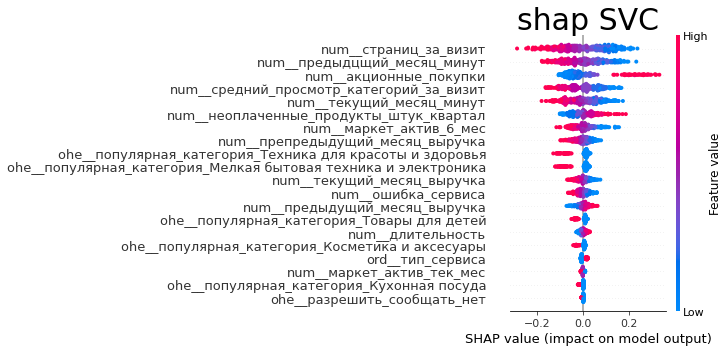

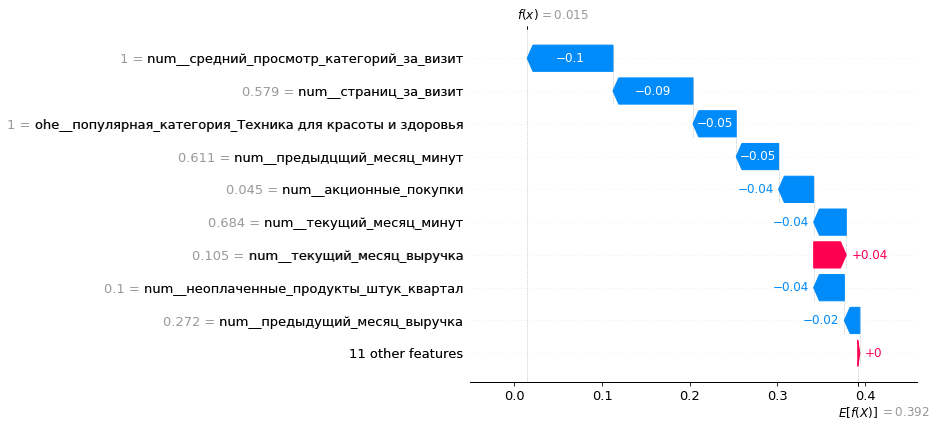

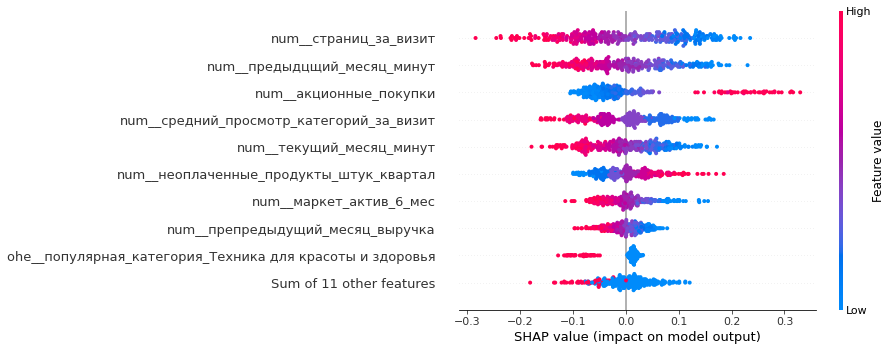

In [98]:
plt.title("shap SVC",fontsize=30)
shap.summary_plot(shap_values, X_test_df, plot_size=(10,5))
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)

Вывод 

- высокие значения покупок по акции и не купленные корзины повышают шанс, что активность снизиться
- высокие значения за посление 6 месяцев повышают шанс, что активность останется прежней
- на активность влияют
    - просмотренные страниц в сессию
    - просмотренные категориии в сессию
    - покупоки по акции
    - время проведенное в текущем периоде

  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- есть график важности факторов, график аккуратный
    
    
- есть выводы о том, какие факторы сильнее/слабее влияют
    
	
- плюс за использование .beeswarm,  ведь он даёт гораздо больше информации    
    
    
    
<div class="alert alert-warning">


Совет 🤔:
   
 
   
	
- можно и по-другому оценить важность признаков, это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html) (но не забываем что в логистической регрессии надо учесть логарифм в функция ошибки). Или с помощью [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html) Если сделать, то должно получиться что-то похожее	
	
	 

## Сегментация покупателей

In [99]:
seg = pd.DataFrame({'id': X_test.index, 'pred': proba[:,1]})                                                                         
seg = seg.merge(money, on='id', how='left')
seg

,id,pred,прибыль
0,216161,0.014517,4.69
1,215654,0.987852,2.75
2,216307,0.103014,3.16
3,215501,0.824504,3.74
4,215934,0.642476,4.40
...,...,...,...
319,215429,0.956100,3.71
320,216233,0.049342,4.62
321,215716,0.852688,4.07
322,216141,0.189869,1.97


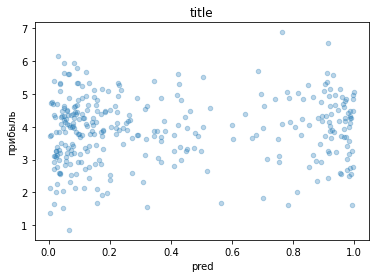

In [100]:
disp_depend(seg,  'pred', 'прибыль', "title")

In [101]:
full_table.columns

Index(['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'предыдцщий_месяц_минут', 'текущий_месяц_минут',
       'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
       'текущий_месяц_выручка'],
      dtype='object')

In [102]:
high_prior_cus = seg.loc[(seg['pred']> 0.5) & (seg['прибыль'] > 3)]
high_prior_cus = full_table.loc[full_table.index.isin(high_prior_cus['id'])]
display(high_prior_cus['покупательская_активность'].count())
display(high_prior_cus.head())

88

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдцщий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.600098
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.399902
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.500000
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,11,12,5685.0,4503.0,5869.600098
215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,6,7,4146.5,4433.0,4566.399902


In [103]:
freq_cus = seg.loc[(seg['pred']< 0.5) & (seg['прибыль'] > 3)]
freq_cus = full_table.loc[full_table.index.isin(freq_cus['id'])]
display(freq_cus['покупательская_активность'].count())
display(freq_cus.head())

173

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдцщий_месяц_минут,текущий_месяц_минут,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
id,,,,,,,,,,,,,,,,,
215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,12,10,3263.0,4749.0,3772.600098
215677,Снизилась,премиум,да,4.6,4,993,0.24,Домашний текстиль,2,3,9,11,17,16,4829.0,4538.0,5211.200195
215746,Снизилась,премиум,да,4.4,4,987,0.35,Техника для красоты и здоровья,3,1,8,6,10,9,3222.0,4932.0,4169.700195
215749,Прежний уровень,премиум,да,5.8,5,624,0.30,Техника для красоты и здоровья,4,3,6,14,14,17,5190.0,4928.0,5092.500000
215752,Прежний уровень,стандарт,нет,4.0,4,475,0.30,Мелкая бытовая техника и электроника,3,3,7,7,13,8,5188.5,4635.0,5798.200195


In [104]:
freq_cus.mean() - high_prior_cus.mean()

маркет_актив_6_мес                       1.149027
маркет_актив_тек_мес                     0.004992
длительность                           -33.666579
акционные_покупки                       -0.272964
средний_просмотр_категорий_за_визит      1.074619
неоплаченные_продукты_штук_квартал      -1.475762
ошибка_сервиса                           0.415003
страниц_за_визит                         5.771348
предыдцщий_месяц_минут                   5.203560
текущий_месяц_минут                      4.545717
предыдущий_месяц_выручка              -145.108398
препредыдущий_месяц_выручка            276.032715
текущий_месяц_выручка                 -180.193848
dtype: float64

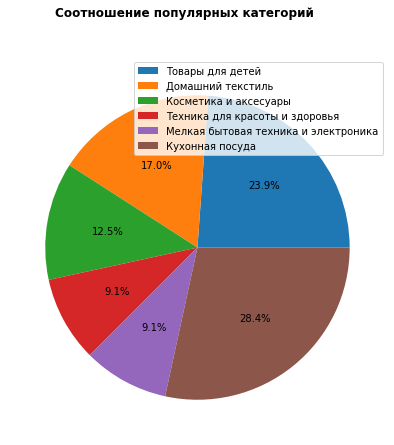

In [105]:
disp_pie(high_prior_cus, 'Соотношение популярных категорий', 'популярная_категория')

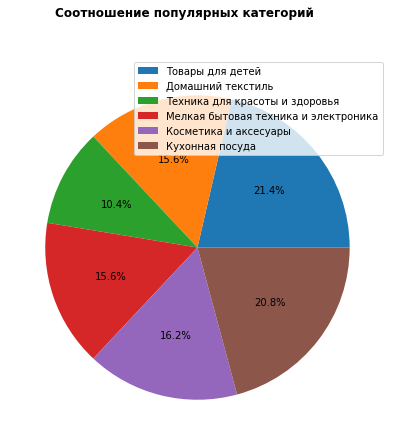

In [106]:
disp_pie(freq_cus, 'Соотношение популярных категорий', 'популярная_категория')

In [107]:
high_prior_cus['популярная_категория'].unique()

['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Мелкая бытовая техника и электроника', 'Кухонная посуда']
Categories (6, object): ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Мелкая бытовая техника и электроника', 'Кухонная посуда']

In [108]:
high_prior_cus.columns

Index(['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'предыдцщий_месяц_минут', 'текущий_месяц_минут',
       'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
       'текущий_месяц_выручка'],
      dtype='object')

In [109]:
period_cols_rev = ['препредыдущий_месяц_выручка', 'предыдущий_месяц_выручка', 'текущий_месяц_выручка']

for cat in high_prior_cus['популярная_категория'].unique():
    display(f'---- {cat} ----')
    curr_activity = freq_cus.loc[freq_cus['популярная_категория'] == cat]
    decrising_activity = high_prior_cus.loc[high_prior_cus['популярная_категория'] == cat]
    for period in period_cols_rev:
        display(f'Среднее значение выручки клиентов с текущей активностью за {period}, {curr_activity[period].mean()}')
        display(f'Среднее значение выручки клиентов с снижающийся активностью за {period}, {decrising_activity[period].mean()}')
        display(f'Разница {curr_activity[period].mean() - decrising_activity[period].mean()}')  

'---- Товары для детей ----'

'Среднее значение выручки клиентов с текущей активностью за препредыдущий_месяц_выручка, 4897.83349609375'

'Среднее значение выручки клиентов с снижающийся активностью за препредыдущий_месяц_выручка, 4600.9599609375'

'Разница 296.87353515625'

'Среднее значение выручки клиентов с текущей активностью за предыдущий_месяц_выручка, 4618.4443359375'

'Среднее значение выручки клиентов с снижающийся активностью за предыдущий_месяц_выручка, 4685.47998046875'

'Разница -67.03564453125'

'Среднее значение выручки клиентов с текущей активностью за текущий_месяц_выручка, 4982.2998046875'

'Среднее значение выручки клиентов с снижающийся активностью за текущий_месяц_выручка, 4977.8759765625'

'Разница 4.423828125'

'---- Домашний текстиль ----'

'Среднее значение выручки клиентов с текущей активностью за препредыдущий_месяц_выручка, 4893.21630859375'

'Среднее значение выручки клиентов с снижающийся активностью за препредыдущий_месяц_выручка, 4681.14306640625'

'Разница 212.0732421875'

'Среднее значение выручки клиентов с текущей активностью за предыдущий_месяц_выручка, 4992.81103515625'

'Среднее значение выручки клиентов с снижающийся активностью за предыдущий_месяц_выручка, 5152.14306640625'

'Разница -159.33203125'

'Среднее значение выручки клиентов с текущей активностью за текущий_месяц_выручка, 5208.47021484375'

'Среднее значение выручки клиентов с снижающийся активностью за текущий_месяц_выручка, 5522.0234375'

'Разница -313.55322265625'

'---- Косметика и аксесуары ----'

'Среднее значение выручки клиентов с текущей активностью за препредыдущий_месяц_выручка, 4925.77783203125'

'Среднее значение выручки клиентов с снижающийся активностью за препредыдущий_месяц_выручка, 4715.06689453125'

'Разница 210.7109375'

'Среднее значение выручки клиентов с текущей активностью за предыдущий_месяц_выручка, 4967.18505859375'

'Среднее значение выручки клиентов с снижающийся активностью за предыдущий_месяц_выручка, 5130.533203125'

'Разница -163.34814453125'

'Среднее значение выручки клиентов с текущей активностью за текущий_месяц_выручка, 5217.1220703125'

'Среднее значение выручки клиентов с снижающийся активностью за текущий_месяц_выручка, 5411.93994140625'

'Разница -194.81787109375'

'---- Техника для красоты и здоровья ----'

'Среднее значение выручки клиентов с текущей активностью за препредыдущий_месяц_выручка, 4930.71435546875'

'Среднее значение выручки клиентов с снижающийся активностью за препредыдущий_месяц_выручка, 4483.5'

'Разница 447.21435546875'

'Среднее значение выручки клиентов с текущей активностью за предыдущий_месяц_выручка, 4556.1962890625'

'Среднее значение выручки клиентов с снижающийся активностью за предыдущий_месяц_выручка, 4272.5625'

'Разница 283.6337890625'

'Среднее значение выручки клиентов с текущей активностью за текущий_месяц_выручка, 4937.32861328125'

'Среднее значение выручки клиентов с снижающийся активностью за текущий_месяц_выручка, 4626.97509765625'

'Разница 310.353515625'

'---- Мелкая бытовая техника и электроника ----'

'Среднее значение выручки клиентов с текущей активностью за препредыдущий_месяц_выручка, 4906.25927734375'

'Среднее значение выручки клиентов с снижающийся активностью за препредыдущий_месяц_выручка, 4612.125'

'Разница 294.13427734375'

'Среднее значение выручки клиентов с текущей активностью за предыдущий_месяц_выручка, 5091.37060546875'

'Среднее значение выручки клиентов с снижающийся активностью за предыдущий_месяц_выручка, 5492.25'

'Разница -400.87939453125'

'Среднее значение выручки клиентов с текущей активностью за текущий_месяц_выручка, 5431.15234375'

'Среднее значение выручки клиентов с снижающийся активностью за текущий_месяц_выручка, 5903.0498046875'

'Разница -471.8974609375'

'---- Кухонная посуда ----'

'Среднее значение выручки клиентов с текущей активностью за препредыдущий_месяц_выручка, 4876.27783203125'

'Среднее значение выручки клиентов с снижающийся активностью за препредыдущий_месяц_выручка, 4598.45458984375'

'Разница 277.8232421875'

'Среднее значение выручки клиентов с текущей активностью за предыдущий_месяц_выручка, 5028.3056640625'

'Среднее значение выручки клиентов с снижающийся активностью за предыдущий_месяц_выручка, 5452.818359375'

'Разница -424.5126953125'

'Среднее значение выручки клиентов с текущей активностью за текущий_месяц_выручка, 5323.9833984375'

'Среднее значение выручки клиентов с снижающийся активностью за текущий_месяц_выручка, 5873.19091796875'

'Разница -549.20751953125'

Вывод 

- разница между клаентами с постоянной активностью с снижением активности
<div style="white-space: pre-wrap">
маркет_актив_6_мес                       1.149027
маркет_актив_тек_мес                     0.004992
длительность                           -33.666579
акционные_покупки                       -0.272964
средний_просмотр_категорий_за_визит      1.074619
неоплаченные_продукты_штук_квартал      -1.475762
ошибка_сервиса                           0.415003
страниц_за_визит                         5.771348
предыдцщий_месяц_минут                   5.203560
текущий_месяц_минут                      4.545717
предыдущий_месяц_выручка              -145.108398
препредыдущий_месяц_выручка            276.032715
текущий_месяц_выручка                 -180.193848
</div>

- клиентов с снижающийся активностью интересуют:
    - Товары для детей
    - Косметика и аксесуары
    - Кухонная посуда
    - Мелкая бытовая техника и электроника

- рекомендуется по данным категориям провести промо акции


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



 
Вот ты выбрал хороший сегмент для анализа.  Теперь нам нужно понять в чём   проблема если модель предсказывает снижение активности для клиентов попавших в него. Для этого мыы можем посмотреть усредненное лицо клиентов попавших в него, но сами по себе цифры и графики нас не интересуют, нас интересует разница с клиентами не попавшими в сегмент. поэтому стоит проанализировать сегмент, указать на его отличия от остальных (а ещё лучше выбрать контрсегмент,  например такие же выгодный для нас клиенты, но для которых модель предсказывает другое поведение). А затем используем метод сравнения


 
И в конце составляем индивидуальные маркетинговые предложения для выбранного сегмента  
    

<div class="alert alert-warning">


Совет 🤔:


 


- еще можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория Товаров), возможно тут получится увидеть что то интересное и сделать какие то маркетинговые предложения. Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное. Если посмотреть на выручки за разные месяцы в группировке по популярным товарам, то можно увидеть выручка по одной группе товаров сильно проседает

 

<div class="alert alert-info">
done
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Было бы лучше если бы ты построил графики.  Прокачал бы свои скилы. Кроме того график содержит больше информации чем просто средняя (. Ведь средние могут быть одинаковыми, но дисперсия куртоси, эсесс могут отличаться)
    
    
Как можно технично построить графики в разбивке по наш_сегмент/все_остальные или наш сегмент/контрсегмент?! Предлагаю вспомнить графики из библиотеки seaborn, и аргумент [hue](https://www.statology.org/seaborn-histogram-hue/) Как видишь код весьма простой, а результаты замечательные. Только нужно предварительно создать столбец "сегмент" которыйбудет заполнен "наш_сегмент"/"не наш сегмент" и сделать hue = "сегмент" 

<div class="alert alert-info">
обязательно посмотрю как это делается) 

на проекте бардак последние 2 месяца, по этому я проболбался со сроками курса, и сейчас бы мне закончить эту финалку и еще одну после нее до конца недели)
    
если есть телеграмм, нет запретов и есть желание, я могу сделать попозже и скинуть)
</div>

## Общий вывод

Вывод по загрузки и обработке данных

- market
    - поля кастанули к нужным типам
    - пропусков не обнаружено
    - явных аномалий не обнаружено
     
    итоговая структура
    
    <div style="white-space: pre-wrap">
       RangeIndex: 1300 entries, 0 to 1299
        Data columns (total 13 columns):
         #   Column                               Non-Null Count  Dtype   
        ---  ------                               --------------  -----   
         0   id                                   1300 non-null   int64   
         1   покупательская_активность            1300 non-null   category
         2   тип_сервиса                          1300 non-null   category
         3   разрешить_сообщать                   1300 non-null   category
         4   маркет_актив_6_мес                   1300 non-null   float32 
         5   маркет_актив_тек_мес                 1300 non-null   int64   
         6   длительность                         1300 non-null   int64   
         7   акционные_покупки                    1300 non-null   float32 
         8   популярная_категория                 1300 non-null   category
         9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
         10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
         11  ошибка_сервиса                       1300 non-null   int64   
         12  страниц_за_визит                     1300 non-null   int64   
        dtypes: category(4), float32(2), int64(7)
    </div>
- market_m 
    - поля кастанули к нужным типам
    - пропусков не обнаружено
    - удалено 5 полных дубликатов
     
    итоговая структура
    
    <div style="white-space: pre-wrap">
        Int64Index: 3899 entries, 0 to 3899
        Data columns (total 3 columns):
         #   Column   Non-Null Count  Dtype   
        ---  ------   --------------  -----   
         0   id       3899 non-null   int64   
         1   период   3899 non-null   category
         2   выручка  3899 non-null   float32 
        dtypes: category(1), float32(1), int64(1)
    </div>
- time
    - поля кастанули к нужным типам
    - пропусков не обнаружено
    - дубликатов не обнаружено
     
    итоговая структура
    
    <div style="white-space: pre-wrap">
        RangeIndex: 2600 entries, 0 to 2599
        Data columns (total 3 columns):
         #   Column  Non-Null Count  Dtype   
        ---  ------  --------------  -----   
         0   id      2600 non-null   int64   
         1   период  2600 non-null   category
         2   минут   2600 non-null   int64   
        dtypes: category(1), int64(2)
    </div>
    
    
- money
    - пропусков не обнаружено
    - дубликатов не обнаружено
    - вообще не понятно что такое "Прибыль" 
    
     
    итоговая структура
    
    <div style="white-space: pre-wrap">
    RangeIndex: 1300 entries, 0 to 1299
    Data columns (total 2 columns):
     #   Column   Non-Null Count  Dtype  
    ---  ------   --------------  -----  
     0   id       1300 non-null   int64  
     1   Прибыль  1300 non-null   float64
    dtypes: float64(1), int64(1)
    </div>
    
- Исследовательский анализ 
    - активность в сравнением с предыдущим месяцем, снизиласть
    - клиентов без подписки больше
    - 74% клиентов иеют включеную нотификацию
    - есть легкие вбросы в Активность последние 6 месяцав
    - средняя маркетинговая активность последние месяц составила 4
    - в среднем клиенты зарегистрированы 600 дней назад
    - ярко выраженная средняя акционных покупок с долей 30%
    - мелкая бытовая техника и товары для детей самые популярные категории
    - в среднем просматривают 4 категории товаров в сессию
    - 1-2 корзины остаются не купленными
    - в среднем простатривают 5-10 страниц в сессию
    - количество совершенных покупок в текущем месяце больше чем в прошлом
    - сумма выручки больше в прошлом
    - время проведенное на сайте в текущем и прошлом месяце одинаково
    
- Обьединени таблиц
    итоговая структура
    <div style="white-space: pre-wrap">
        Int64Index: 1300 entries, 215348 to 216647
        Data columns (total 17 columns):
         #   Column                               Non-Null Count  Dtype   
        ---  ------                               --------------  -----   
         0   покупательская_активность            1300 non-null   category
         1   тип_сервиса                          1300 non-null   category
         2   разрешить_сообщать                   1300 non-null   category
         3   маркет_актив_6_мес                   1300 non-null   float32 
         4   маркет_актив_тек_мес                 1300 non-null   int64   
         5   длительность                         1300 non-null   int64   
         6   акционные_покупки                    1300 non-null   float32 
         7   популярная_категория                 1300 non-null   category
         8   средний_просмотр_категорий_за_визит  1300 non-null   int64   
         9   неоплаченные_продукты_штук_квартал   1300 non-null   int64   
         10  ошибка_сервиса                       1300 non-null   int64   
         11  страниц_за_визит                     1300 non-null   int64   
         12  предыдцщий_месяц_минут               1300 non-null   int64   
         13  текущий_месяц_минут                  1300 non-null   int64   
         14  предыдущий_месяц_выручка             1300 non-null   float32 
         15  препредыдущий_месяц_выручка          1300 non-null   float32 
         16  текущий_месяц_выручка                1300 non-null   float32 
        dtypes: category(4), float32(5), int64(8)
    </div>
        
- Корреляционный анализ
    - мультиколлинеарности не обнаружено
- Использование пайплайнов
    - Лучшая модель линейная SVC, F1: 0.86, precision = 0.97
    - По бизнес задачи, нужно найти тех у кого снизится активность и бустануть их, по этому нам нужно избивиться от TP, а значит максимизировать precision 
    
- Анализ важности признаков
    - высокие значения покупок по акции и не купленные корзины повышают шанс, что активность снизиться
    - высокие значения за посление 6 месяцев повышают шанс, что активность останется прежней
    - на активность влияют
        - просмотренные страниц в сессию
        - просмотренные категориии в сессию
        - покупоки по акции
        - время проведенное в текущем периоде
    
- Сегментация покупателей
    - разница между клаентами с постоянной активностью с снижением активности
        <div style="white-space: pre-wrap">
            маркет_актив_6_мес                       1.149027
            маркет_актив_тек_мес                     0.004992
            длительность                           -33.666579
            акционные_покупки                       -0.272964
            средний_просмотр_категорий_за_визит      1.074619
            неоплаченные_продукты_штук_квартал      -1.475762
            ошибка_сервиса                           0.415003
            страниц_за_визит                         5.771348
            предыдцщий_месяц_минут                   5.203560
            текущий_месяц_минут                      4.545717
            предыдущий_месяц_выручка              -145.108398
            препредыдущий_месяц_выручка            276.032715
            текущий_месяц_выручка                 -180.193848
        </div>

    - клиентов с снижающийся активностью интересуют:
        - Товары для детей
        - Косметика и аксесуары
        - Кухонная посуда
        - Мелкая бытовая техника и электроника

    - рекомендуется по данным категориям провести промо акции



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Спасибо за работу Сергей, но пока не могу принять проект, поэтому с тобой мы ещё пообщаемся

 
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

    
- в каждом проекте мы строим графики, почему бы не написали универсальную функцию, которую можно будет использовать во всех следующих проектах (Например функцию для построения boxplot и гистограммы для количественных признаков)
    
         
- хорошо бы матрицы корреляций и графики построить  в разбивке по таргету, это хороший подход если мы хотим увидеть что то дополнительно
    	
    
- поработать надо оформлением графиков, используя subplots,  seaborn вместо matplotlib     

 
 
- можно использовать библиотеку phik, чтобы посмотреть на корреляцию между признаками и нашим бинарным таргетом 
    

- закодировать "снизилась" единичкой  (это может уберечь от дальнейшей путаницы). Это можно сделать вручную, или с помощью LabelEncoder
    
	
- для market_money, market_time   стоит построить графики с учетом группировки по "период" 


 
    
Обязательное к исправлению:




 
    
 
- стоит так выполнить read_csv, чтобы данные были  прочтены верно (например числовые данные, или даты не должны стать строковыми)  
 

- работаем со стилистикой название столбцов. Верблюжий стиль - это для названий классов
    
    
 
    
- "препредыдущий_месяц" - это 2 месяца назад, 'предыдцщий_месяц' - 1 месяц назад, это не одно и то же    
       
    
- перед объединением разворачиваем строки в столбцы    

 

- объясняем почему выбрали ту или иную метрику


  
- анализируем наш сегмент с помощью графиков, описательных статистик смотрим чем он отличается от контрсегмента, делаем маркетинговые предложения  



Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

     

Что осталось из красного:

 
- не забываем убирать неактивных и выброс. После исправления этого, проект можно принимать 


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!    

    
Красное исправлено. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

 
  
Отличная работа Сергей. Желаю успехов в дальнейшей учебе!
 